In [1]:
import pandas as pd 
import numpy as np
import netCDF4
import xarray as xr 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
wind4 = xr.open_dataset('ERA5-Algeria_wind-4.nc') #2011-01-01T00:00 to 2018-12-31T21:00

In [5]:
w4 = np.sqrt(np.square(wind4.u100)+np.square(wind4.v100))

In [3]:
fig = plt.figure();

<Figure size 432x288 with 0 Axes>

### Geographic coordinates of the selected grid points 

## Overlap coefficient, with " lat: 28.25 lon: 2.5  maximum wind speed in Algeria" in the period [2011-01-01 to 2018-09-30T21]

In [6]:
#-----------------------------------------------------------------------
#fig = plt.figure()
ax = fig.add_subplot(111)
#the geographic grid cell I compare with (where the maximum wind apeed)
wc = w4.sel(longitude=2.5 , latitude=28.25 ,time=slice('2011-01-01T00:00','2018-09-30T21:00:00'))
a = pd.DataFrame(xr.plot.hist(wc, density=True, ax=ax, bins=np.linspace(0, 20, 101))).T

tlat=93 
tlon=101
c = np.zeros((100))
ov = np.zeros((93,101))
lat = 38.25
for i in range(0,tlat):
    lat=lat-0.25
    lon = -10.25
    for j in range(0,tlon):
        lon = lon +0.25 
        wt = w4.sel(longitude=lon , latitude=lat ,time=slice('2011-01-01T00:00','2018-09-30T21:00:00'))
        b = pd.DataFrame(xr.plot.hist(wt, density=True, ax=ax, bins=np.linspace(0, 20, 101))).T
        
        k=0
        for k in range(0,100):
            a[0][k]
            b[0][k]
            
            c[k] = (min(a[0][k], b[0][k])*20/100)
        t = c.sum()
        ov[i,j] = t
                    
#OVL = xr.DataArray(ov, [("latitude", np.linspace(38, 15, 93)),("longitude", np.linspace(-10, 15, 101))])   

<ipython-input-6-c530f8145b0a>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


In [7]:
OVL = xr.DataArray(ov, [("latitude", np.linspace(38, 15, 93)),("longitude", np.linspace(-10, 15, 101))])   

In [8]:
OVL.min()

<xarray.DataArray ()>
array(0.14081733)

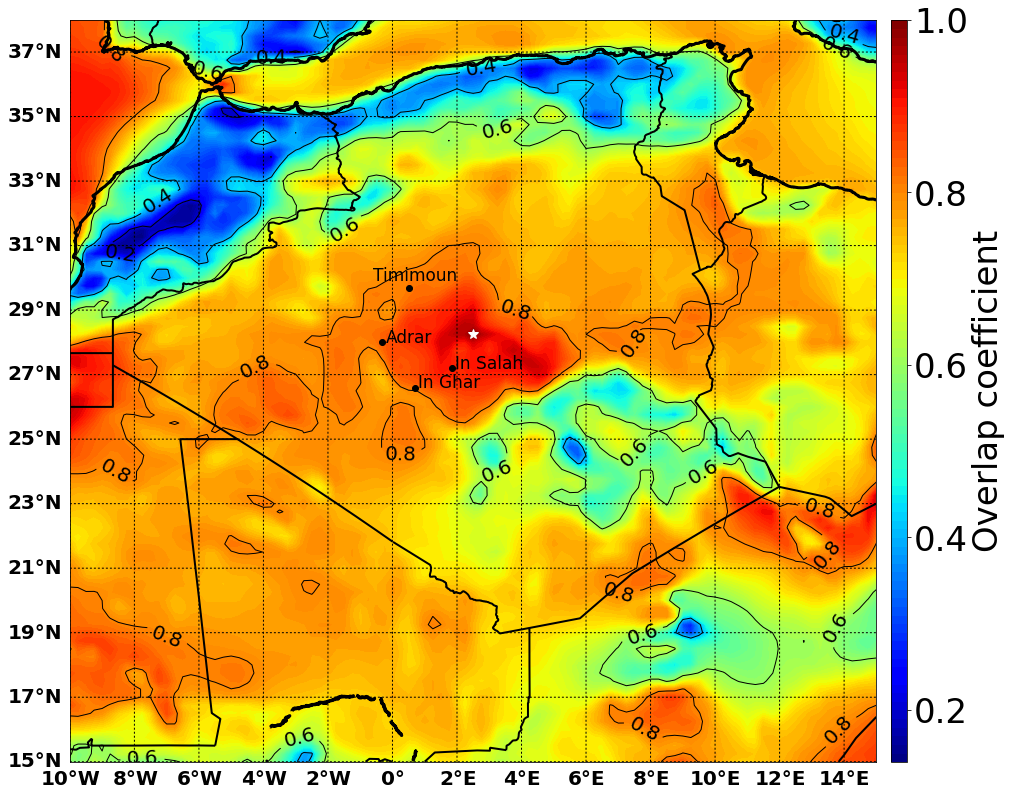

In [9]:
plt.figure(figsize=(15,15))
m = Basemap(projection='cyl',llcrnrlat=15.,urcrnrlat=38.,llcrnrlon=-10.,urcrnrlon=15.,\
            #lat_1=20.,lat_2=40.,lat_0=30.,lon_0=232.
            resolution ='h',area_thresh=1000.)
m.drawcoastlines(linewidth = 3)
m.drawcountries(linewidth = 2)
#m.drawstates()
#m.drawmapboundary()
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(15,40,2),dashes=[2,2],labels=[1,0,0,0],fontsize=20, fontweight='bold')
m.drawmeridians(np.arange(-10,15,2),dashes=[2,2],labels=[0,0,0,1],fontsize=20, fontweight='bold')
xpt,ypt = m(OVL.longitude,OVL.latitude)

X,Y = np.meshgrid(np.linspace(xpt[0],xpt[100],101),np.linspace(ypt[0],ypt[92],93))
#im1 = m.contourf(X,Y,xwind.u10[0],50,cmap='bwr',latlon="True",norm=MidpointNormalize(midpoint=0.))
im1 = m.contourf(X,Y,OVL,100,cmap=plt.cm.jet ,latlon="True") 

levels = np.array(np.linspace(0.0, 1.0, 6))
#levels = np.around(levels, decimals=1)
co = m.contour(X,Y,OVL, levels=levels, colors='k', linewidths=1);
plt.clabel(co, fmt='%1.1f', fontsize=20)

#ax = fig.add_subplot(111)
#ax.clabel(co, inline=True, fontsize=15)
cb = m.colorbar(im1,"right",  size="2%", ticks=np.arange(0, 1.9, 0.2), pad=0.2)

plt.plot(1.85, 27.2, 'o',color='black',markersize=6) #In Salah
plt.text(1.95, 27.2, 'In Salah', fontsize=17)
plt.plot(0.7, 26.6, 'o',color='black',markersize=6) #In Ghar
plt.text(0.8, 26.6, 'In Ghar', fontsize=17)
plt.plot(-0.33, 28, 'o',color='black',markersize=6) #Adrar
plt.text(-0.2, 28, 'Adrar', fontsize=17)
plt.plot(0.5, 29.68, 'o',color='black',markersize=6) #Timimun
plt.text(-0.6, 29.9, 'Timimoun', fontsize=17)
#plt.plot(-1, 34.5, 'o',color='black',markersize=6) 
#plt.plot(5.5, 24.75, 'o',color='black',markersize=6) 
plt.plot(2.5, 28.25, '*',color='white',markersize=10)
#plt.plot(5.5, 25.5, '*',color='black',markersize=10)
cb.set_label(r"Overlap coefficient", size=34)
cb.ax.tick_params(labelsize=34)
#plt.title('Geographic distribution of overlap coefficient of wind speed distribution with the target ', size=20)
#print(s)
plt.show();

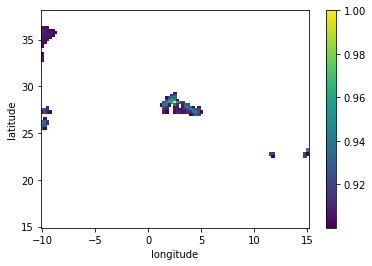

In [10]:
OVL.where(OVL>0.9).plot()

## HISTOGRAMS OF FOUR LOCATIONS "In Salah, 

(0.0, 0.17)

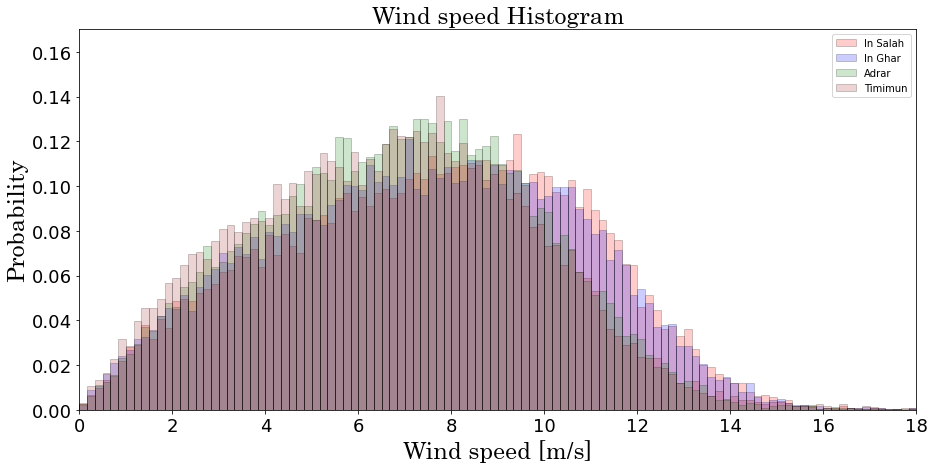

In [11]:
## Histogram of four geographic point

plt.figure(figsize=(15,7))
wda1 = w4.sel(longitude=2.5 , latitude=27.25 ,time=slice('2011-01-01T00:00','2018-09-30T21:00:00')) #In_Salah
wda2 = w4.sel(longitude=2 , latitude=27.0 ,time=slice('2011-01-01T00:00','2018-09-30T21:00:00')) #In_Ghar
wda3 = w4.sel(longitude=-0.25 , latitude=28 ,time=slice('2011-01-01T00:00','2018-09-30T21:00:00')) #Adrar
wda4 = w4.sel(longitude=0.25 , latitude=29.25 ,time=slice('2011-01-01T00:00','2018-09-30T21:00:00')) #Timimun
tht1=xr.plot.hist(wda1, density=True, bins = np.linspace(0, 20, 121), label='In Salah', color='red', alpha=0.2, edgecolor = 'black');
tht2=xr.plot.hist(wda2, density=True, bins = np.linspace(0, 20, 121), label='In Ghar', color='blue', alpha=0.2, edgecolor = 'black');
tht3=xr.plot.hist(wda3, density=True, bins = np.linspace(0, 20, 121), label='Adrar', color='green', alpha=0.2, edgecolor = 'black');
tht4=xr.plot.hist(wda4, density=True, bins = np.linspace(0, 20, 121), label='Timimun', color='brown', alpha=0.2, edgecolor = 'black');

plt.legend()
plt.xlim(0, 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Wind speed Histogram", fontname='Century', size=24, color='black', )
plt.xlabel('Wind speed [m/s]', fontname='Century', size=24)
plt.ylabel('Probability', fontname='Century', size=24)
#plt.plot(x1, y1,  color='red', linewidth=3, linestyle='dashed', alpha=0.5)
#plt.plot(x1, y2,  color='blue', linewidth=3, linestyle='dashed', alpha=0.5)
#plt.plot(x1, y3,  color='green', linewidth=3, linestyle='dashed', alpha=0.5)
#plt.plot(x1, y4,  color='brown', linewidth=3, linestyle='dashed', alpha=0.5)
plt.ylim(0,0.17)


Text(0, 0.5, 'Wind speed [m/s]')

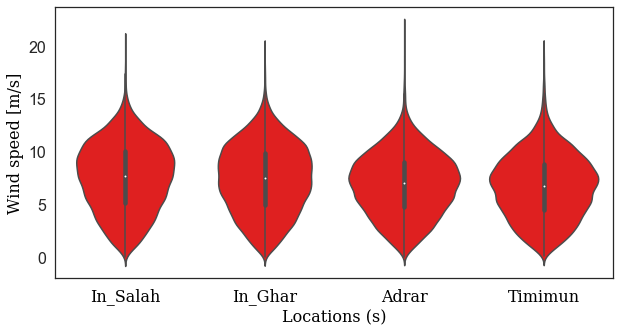

In [13]:
# violin plots at ["In_Salah", "In_Ghar", "Adrar", "Timimun"]
import seaborn as sns

sns.set_theme(style="white")
plt.figure(figsize=(10,5))
data = list([wda1, wda2, wda3, wda4])

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
#ax.set_xticklabels(["In_Salah", "In_Ghar", "Adrar", "Timimun"])
g = sns.violinplot(data=data, color='red', showmeans=True, showextrema=True, showmedians=True)
g.set_xticklabels(["In_Salah", "In_Ghar", "Adrar", "Timimun"], color='black', fontdict=font);
g.tick_params(axis='y', labelsize=16)

plt.xlabel('Locations (s)', fontdict=font)
plt.ylabel('Wind speed [m/s]', fontdict=font)

In [15]:
wda5 = w4.sel(longitude=2.5 , latitude=28.25 ,time=slice('2011-01-01T00:00','2018-09-30T21:00:00')) #Max_In_Salah_lat: 28.25 lon: 2.5 
wda6 = w4.sel(longitude=-1 , latitude=34.5 ,time=slice('2011-01-01T00:00','2018-09-30T21:00:00')) #North_West_lat: 34.5 lon: -1 
wda7 = w4.sel(longitude=5.5 , latitude=24.75 ,time=slice('2011-01-01T00:00','2018-09-30T21:00:00')) #East_South_lat: 24.75 lon: 5.5

<ipython-input-16-2cf4a74e4bde>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, color='black', fontdict=font)


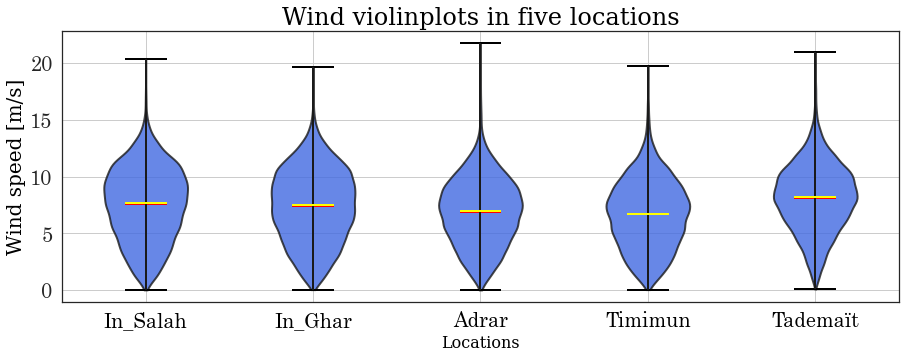

In [16]:
%matplotlib inline
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(15,5))
data = list([wda1, wda2, wda3, wda4, wda5])
labels = ["","In_Salah", "In_Ghar", "Adrar","Timimun","Tademaït"]

violin_parts = ax.violinplot(data, vert=True, widths=0.5, showmeans=True, showmedians=True, showextrema=True)
for vp in violin_parts['bodies']:
    vp.set_facecolor('royalblue')
    vp.set_edgecolor('k')
    vp.set_linewidth(2)
    vp.set_alpha(.8)

colors = ['k', 'black', 'black', 'red', 'yellow']
part = ['cbars','cmins','cmaxes','cmeans','cmedians']

for i in range(len(part)):
    vp = violin_parts[part[i]]
    vp.set_edgecolor(colors[i])
    vp.set_linewidth(2)
    
ax.set_xticklabels(labels, color='black', fontdict=font)


plt.title("Wind violinplots in five locations", size=24, fontdict=font, color='black', )
#plt.xlabel('probability', size=20)
plt.xlabel('Locations', fontdict=font)
plt.ylabel('Wind speed [m/s]',  fontdict=font, size=20)
#plt.legend()
plt.xlim(0.5, 5.5, 5)

plt.xticks(fontname='Century', fontsize=20)
plt.yticks(fontname='Century', fontsize=20)
ax.grid(True)
    
plt.show()

<ipython-input-20-e7a7cd37cc11>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, color='black', fontdict=font)


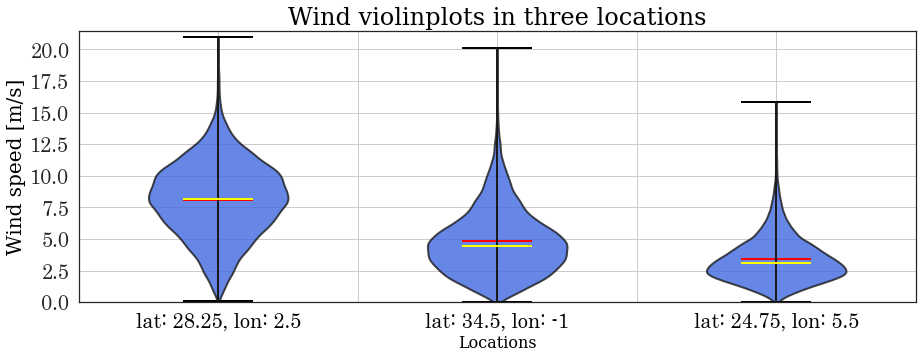

In [20]:
%matplotlib inline
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(15,5))
data = list([wda5, wda6, wda7])
labels = ["","lat: 28.25, lon: 2.5", "", "lat: 34.5, lon: -1", "", "lat: 24.75, lon: 5.5"]

violin_parts = ax.violinplot(data, vert=True, widths=0.5, showmeans=True, showmedians=True, showextrema=True)
for vp in violin_parts['bodies']:
    vp.set_facecolor('royalblue')
    vp.set_edgecolor('k')
    vp.set_linewidth(2)
    vp.set_alpha(.8)

colors = ['k', 'black', 'black', 'red', 'yellow']
part = ['cbars','cmins','cmaxes','cmeans','cmedians']

for i in range(len(part)):
    vp = violin_parts[part[i]]
    vp.set_edgecolor(colors[i])
    vp.set_linewidth(2)
    
ax.set_xticklabels(labels, color='black', fontdict=font)


plt.title("Wind violinplots in three locations", fontdict=font, size=24, color='black', )
#plt.xlabel('probability', size=20)
plt.xlabel('Locations', fontdict=font)
plt.ylabel('Wind speed [m/s]',  fontdict=font, size=20)
#plt.legend()
plt.xlim(0.5, 3.5, 3)
plt.ylim(0.0, 21.5, 0.5)

plt.xticks(fontname='Century', fontsize=20)
plt.yticks(fontname='Century', fontsize=20)
ax.grid(True)
    
plt.show()

## Wind histograms, in 2018

Text(0, 0.5, 'probability')

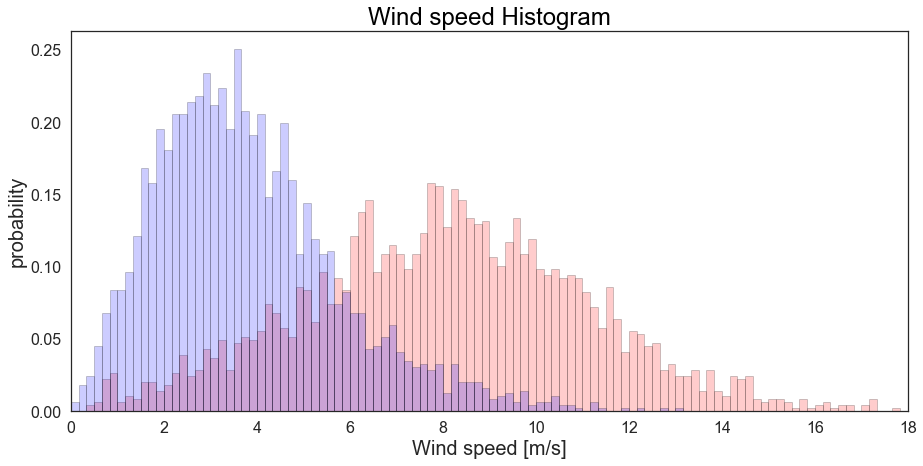

In [18]:
plt.figure(figsize=(15,7))
wda1 = w4.sel(longitude=2.5 , latitude=28.25 ,time=slice('2017-10-01T00:00:00','2018-09-30T23:00:00')) #max wind Algeria
wda2 = w4.sel(longitude=5.5 , latitude=25 ,time=slice('2017-10-01T00:00:00','2018-09-30T23:00:00')) #min wind In_Salah
wda3 = w4.sel(longitude=2.25 , latitude=25.5 ,time=slice('2017-10-01T00:00:00','2018-09-30T23:00:00')) #min pearson solar_vs_wind
wda4 = w4.sel(longitude=-0.5 , latitude=32.75 ,time=slice('2017-10-01T00:00:00','2018-09-30T23:00:00')) #min pearson solar_vs_wind
tht1=xr.plot.hist(wda1, density=True, bins = np.linspace(0, 20, 121), color='red', alpha=0.2, edgecolor = 'black');
tht2=xr.plot.hist(wda2, density=True, bins = np.linspace(0, 20, 121), color='blue', alpha=0.2, edgecolor = 'black');
#tht3=xr.plot.hist(wda3, density=True, bins = np.linspace(0, 20, 121), color='green', alpha=0.2, edgecolor = 'black');
#tht4=xr.plot.hist(wda4, density=True, bins = np.linspace(0, 20, 121), color='black', alpha=0.2, edgecolor = 'black');
#plt.legend()
plt.xlim(0, 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Wind speed Histogram", size=24, color='black', )
plt.xlabel('Wind speed [m/s]', size=20)
plt.ylabel('probability', size=20)

Text(0, 0.5, 'probability')

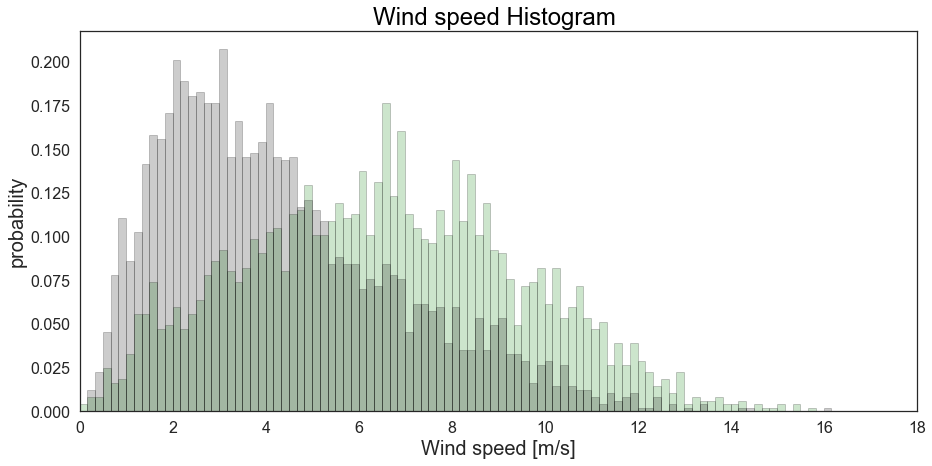

In [19]:
plt.figure(figsize=(15,7))
wda1 = w4.sel(longitude=2.5 , latitude=28.25 ,time=slice('2017-10-01T00:00:00','2018-09-30T23:00:00')) #max wind Algeria
wda2 = w4.sel(longitude=5.5 , latitude=25 ,time=slice('2017-10-01T00:00:00','2018-09-30T23:00:00')) #min wind In_Salah
wda3 = w4.sel(longitude=2.25 , latitude=25.5 ,time=slice('2017-10-01T00:00:00','2018-09-30T23:00:00')) #min pearson solar_vs_wind
wda4 = w4.sel(longitude=-0.5 , latitude=32.75 ,time=slice('2017-10-01T00:00:00','2018-09-30T23:00:00')) #min pearson solar_vs_wind
#tht1=xr.plot.hist(wda1, density=True, bins = np.linspace(0, 20, 121), color='red', alpha=0.2, edgecolor = 'black');
#tht2=xr.plot.hist(wda2, density=True, bins = np.linspace(0, 20, 121), color='blue', alpha=0.2, edgecolor = 'black');
tht3=xr.plot.hist(wda3, density=True, bins = np.linspace(0, 20, 121), color='green', alpha=0.2, edgecolor = 'black');
tht4=xr.plot.hist(wda4, density=True, bins = np.linspace(0, 20, 121), color='black', alpha=0.2, edgecolor = 'black');
#plt.legend()
plt.xlim(0, 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Wind speed Histogram ", size=24, color='black', )
plt.xlabel('Wind speed [m/s]', size=20)
plt.ylabel('probability', size=20)